# Library and Path Setting

In [2]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import scipy
import cv2


# load Neural Network Model Library => condition 3 of assignment
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [5]:
# 이런식으로 동주씨가 만든 maml코드랑 동일하게 전처리시키고 싶었는데 아래 cifar10.zip이 없어서 이 코드를 적용시킬 수 없었습니다. 죄송합니다.
# 그래서 우선최대한 이와 비슷하게 구현해 보았고 이와 비슷하게 나머지 모델도 학습하겠습니다.


# dataset = '/content/gdrive/My Drive/Colab_Notebooks/DL/datasets/cifar10.zip'
# dst_path = '/content/cifa10'
# dst_file = os.path.join(dst_path, 'cifar10.zip')

# if not os.path.exists(dst_path):
#   os.makedirs(dst_path)

# # copy zip file
# shutil.copy(dataset, dst_file)
  
# with zipfile.ZipFile(dst_file, 'r') as file:
#   file.extractall(dst_path)


# train_dir = os.path.join(dst_path, 'cifar10/train')

# test_dir = os.path.join(dst_path, 'cifar10/test')

# print('total training  images:', len(os.listdir(train_dir)))

# print('total test images:', len(os.listdir(test_dir)))

# # path
# train_path = "/content/cifa10/cifar10/train/"
# test_path = "/content/cifa10/cifar10/test/"

# # library
# import keras
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# import os
# import scipy



# # load Neural Network Model Library => condition 3 of assignment
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
# from keras.layers import Conv2D, MaxPooling2D
# # Set generator with rescaler(1./255) -> condition 2 of assignment
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # make a loading data flow from path. It generates data at each batch sizes -> condition 1 of assignment
# batch_size_num = 100
# train_generator = train_datagen.flow_from_directory(train_path,
#                                                     classes=sorted(os.listdir(train_path)),
#                                                     batch_size = batch_size_num,
#                                                     target_size = (256, 256),
#                                                     subset="training",
#                                                     class_mode='categorical')

# valid_generator = train_datagen.flow_from_directory(train_path, 
#                                                     classes=sorted(os.listdir(train_path)), 
#                                                     batch_size = batch_size_num, 
#                                                     target_size=(256, 256), 
#                                                     subset="validation",
#                                                     class_mode='categorical')


# test_generator = test_datagen.flow_from_directory(test_path, 
#                                                   classes=sorted(os.listdir(test_path)),
#                                                   batch_size = 100,
#                                                   target_size = (256, 256),
#                                                   class_mode='categorical')

## Data Load   
ImageDataGenerator로 데이터를 로드하면서 rescale을 동시에 진행하도록 했습니다.  
원본 데이터셋 디렉토리 구조가 train, test만 존재하여 ImageDataGenerator로 로드하면서 validation_split을 0.1로 주어 동시에 validation data를 분할하도록 했습니다.  
아래 학습부분에서 model.fit_generator를 활용했기에 학습에 대한 하이퍼파라미터인 batch_size는 아래 flow_from_directory 메서드의 파라미터로 조절합니다.

In [6]:

# Convert labels to categorical format
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


# Set generator parameters
batch_size = 100

# 경로를 지정하지 않고 load_data를 사용해서 flow_from_directory를 사용할 수 없었습니다
# 그래서 최대한 비슷하게 flow함수 써서 구현해보았습니다.
# 동주씨 코드 보니까 flow_from_directory사용시 target_size 지정해서 변경해 주었는데 단순 flow는 지원을 해주지 않아서
# 수동으로 resize할려고 했는데 gpu초과해서 기본 크기 (5000,32,32,3)로 학습했습니다. -> 그에 따라서 모델에 일부 변경이있습니다.
# cv2.resize 쓰니까 gpu가 초과되서그런지 계속 죽네요



# Set generator parameters
batch_size = 100

# Create train, validation, and test generators
train_generator = train_datagen.flow(x_train, y_train,
                                     batch_size=batch_size,
                                     subset="training")

valid_generator = train_datagen.flow(x_train, y_train,
                                     batch_size=batch_size,
                                     subset="validation")

test_generator = test_datagen.flow(x_test, y_test,
                                   batch_size=batch_size)


In [7]:
# # 원래 동주씨 코드




# # Set generator with rescaler(1./255) -> condition 2 of assignment



# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # make a loading data flow from path. It generates data at each batch sizes -> condition 1 of assignment
# batch_size_num = 100
# train_generator = train_datagen.flow_from_directory(train_path,
#                                                     classes=sorted(os.listdir(train_path)),
#                                                     batch_size = batch_size_num,
#                                                     target_size = (256, 256),
#                                                     subset="training",
#                                                     class_mode='categorical')

# valid_generator = train_datagen.flow_from_directory(train_path, 
#                                                     classes=sorted(os.listdir(train_path)), 
#                                                     batch_size = batch_size_num, 
#                                                     target_size=(256, 256), 
#                                                     subset="validation",
#                                                     class_mode='categorical')


# test_generator = test_datagen.flow_from_directory(test_path, 
#                                                   classes=sorted(os.listdir(test_path)),
#                                                   batch_size = 100,
#                                                   target_size = (256, 256),
#                                                   class_mode='categorical')

In [8]:
# check shape of data shape
print("check shape of data shape")
for x_data, class_data in train_generator:
    print(f"input data shape from train_generator: {x_data.shape}")
    print(f"class data shape from train_generator: {class_data.shape}")
    break

for x_data, class_data in valid_generator:
    print(f"input data shape from valid_generator: {x_data.shape}")
    print(f"class data shape from valid_generator: {class_data.shape}")
    break
    
for x_data, class_data in test_generator:
    print(f"input data shape from test_generator: {x_data.shape}")
    print(f"class data shape from test_generator: {class_data.shape}")
    break    


check shape of data shape
input data shape from train_generator: (100, 32, 32, 3)
class data shape from train_generator: (100, 10)
input data shape from valid_generator: (100, 32, 32, 3)
class data shape from valid_generator: (100, 10)
input data shape from test_generator: (100, 32, 32, 3)
class data shape from test_generator: (100, 10)


# Model Architecture  
모델 아키텍쳐는 Image Classification이기에, 기본적인 AlexNet의 구조에서 10개의 class를 classify하도록 변형했습니다.  
또한 Fully Connected Layer에서 Batch Normalization(Batch 형태로 나누어진 데이터를 고려하여 정규화. Local optimum으로 인한 학습속도 저하 및 멈춤을 방지하기 위해 사용), Dropout(뉴런을 부분적으로 생략하여 오버피팅 방지)을 조합하여 사용함으로 학습과정을 보다 효율적으로 만들었습니다.

In [9]:
# set neural model architecture (transform AlexNet architecture)
# 입력데이터가 기존 코드에는 256,256,3이 었지만 resize하지 않은 데이터를 사용하여 input_shape(32,32,3)으로 다시 설정했습니다.
#그에 따라 변경된 부분은 아래 코드에 주석으로 달아놓겠습니다.)

model = Sequential()

# Convolutional layers
model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=(32, 32, 3))) #model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))                         # model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))

model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))

model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(1, 1), strides=(2, 2)))                         # model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())

# Fully-connected layers

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 6, 6, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 2, 2, 256)        1024      
 hNormalization)                                                 
                                                        

# Training Step  
fit_generator 메소드를 사용하여 학습했습니다. steps_per_epoch 파라미터의 경우, ImageDatagenerator의 파라미터인 batch_size로 전체 데이터 사이즈를 나누었기에 iteration과 같습니다.  
하이퍼파라미터인 epochs는 여기서 조절합니다.  

이후 Hyper Parameter Optimization은 batch_size => Train data와 Valid data 크기의 공약수 중 3개, epoch => 20, 25, 30을 기준으로 진행했습니다.  
(batch_size, epoch) => (100, 20), (100, 25), (100, 30), (200, 20), (200, 25), (200, 30), (250, 20), (250, 25), (250, 30)

In [10]:
# train with fit_generator method
# steps_per_epoch => same with iterations(train_data_size//batch_size) in model.fit

epochs_num = 30
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.n//valid_generator.batch_size,
    shuffle=True,
    epochs=epochs_num)

<ipython-input-10-4251e862fe27>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
450/450 [==============================] - 26s 18ms/step - loss: 2.2676 - accuracy: 0.2168 - val_loss: 1.9086 - val_accuracy: 0.2844
Epoch 2/30
450/450 [==============================] - 7s 15ms/step - loss: 1.7936 - accuracy: 0.3221 - val_loss: 1.7121 - val_accuracy: 0.3526
Epoch 3/30
450/450 [==============================] - 7s 15ms/step - loss: 1.6564 - accuracy: 0.3841 - val_loss: 1.7164 - val_accuracy: 0.3702
Epoch 4/30
450/450 [==============================] - 7s 17ms/step - loss: 1.5683 - accuracy: 0.4292 - val_loss: 1.9790 - val_accuracy: 0.3322
Epoch 5/30
450/450 [==============================] - 8s 17ms/step - loss: 1.4971 - accuracy: 0.4644 - val_loss: 1.5309 - val_accuracy: 0.4574
Epoch 6/30
450/450 [==============================] - 7s 15ms/step - loss: 1.4351 - accuracy: 0.4866 - val_loss: 1.5158 - val_accuracy: 0.4528
Epoch 7/30
450/450 [==============================] - 7s 16ms/step - loss: 1.3801 - accuracy: 0.5111 - val_loss: 1.4365 - val_accuracy: 0.486

# Plot of Training Result
Accuracy Plot과 Loss Plot을 학습기록에서 불러와 관찰합니다.

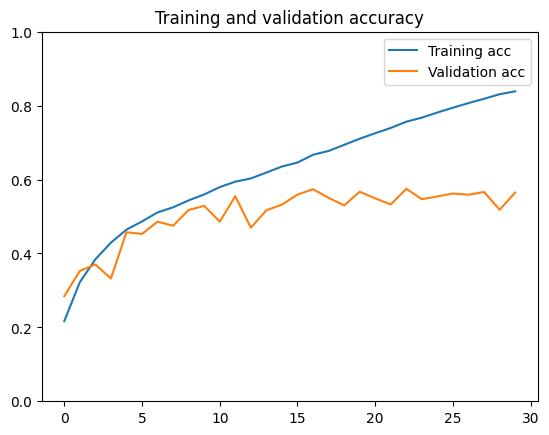

In [11]:
# accuracy plot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, label="Training acc")
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim(0,1)
#plt.savefig(f'./result_plot/batch_{batch_size_num}_epoch_{epochs_num}_acc_plot.png')
plt.show()

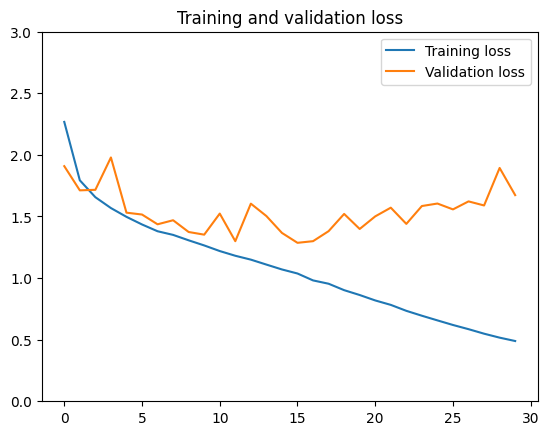

In [12]:
# loss plot
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label="Training loss")
plt.plot(epochs, val_acc, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim(0, 3)
#plt.savefig(f'./result_plot/batch_{batch_size_num}_epoch_{epochs_num}_loss_plot.png')
plt.show()

# Evaluation  
테스트 데이터에 대해서 학습된 모델의 성능을 확인합니다.

In [15]:
# model evaluation
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=test_generator.n//test_generator.batch_size)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --


<ipython-input-15-8190f70dd792>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, steps=test_generator.n//test_generator.batch_size)


accuracy: 55.16%
